# 17 - 预测模型 101

我们将离开本书的第一部分。那部分涵盖了因果推理的核心。那里的技术是众所周知和成熟的。他们经受住了时间的考验。第一部分建立了我们可以依赖的坚实基础。用更专业的术语来说，第一部分侧重于定义什么是因果推理，哪些偏差会阻止相关性成为因果关系，调整这些偏差的多种方法（回归、匹配和倾向得分）和规范识别策略（工具变量、双重差分 和 断点回归）。总之，第一部分重点介绍了我们用来确定平均干预效果 \\(E[Y_1 - Y_0]\\) 的标准技术。
 
当我们进入第二部分时，事情会变得有点不稳定。我们将介绍因果推理文献的最新发展、它与机器学习的关系以及行业中的应用。从这个意义上说，我们在学术严谨性与适用性和经验主义之间进行了权衡。第 II 部分中介绍的一些方法没有关于它们为什么起作用的可靠理论。尽管如此，当我们尝试它们时，它们似乎仍然有效。从这个意义上说，对于想要在日常工作中使用因果推理的行业从业者，而不是想要研究世界上基本因果关系的科学家，第二部分可能更有用。
 
第二部分的前几章将侧重于估计异质治疗效果。我们将从一个只关心平均治疗效果 \\(E[Y_1 - Y_0]\\) 的世界转移到一个我们想知道不同单位对治疗有何不同反应的世界\\(E[ Y_1 - Y_0 | X]\\)。这是个性化至关重要的世界。我们希望优先治疗那些治疗效果最有影响的人，我们不想治疗那些治疗对他们有害的人。从某种意义上说，我们也在从一个关于平均治疗效果的积极问题转向一个规范性问题：我们应该治疗谁？
 
这是大多数企业问自己的问题，尽管措辞略有不同：我应该给谁打折？我应该对贷款收取多少利率？我应该向该用户推荐什么项目？我应该向每位客户展示什么页面布局？这些都是治疗效果异质性问题，我们可以使用第二部分中提供的工具来回答。但在我们这样做之前，我只公平地介绍一下机器学习对行业的意义，因为这将成为我们稍后将用于因果推理的基本工具。


## 工业界中的机器学习
 
本章的重点是谈谈我们在工业界中通常是如何使用**机器学习**的。如果您不熟悉机器学习，可以将本章视为机器学习速成课程。如果您以前从未使用过 ML，我强烈建议您至少学习基础知识，以充分利用即将发生的事情。但这并不意味着如果您已经精通机器学习，就应该跳过本章。我仍然认为你会从阅读中受益。与其他机器学习材料不同，这本书**不会**讨论决策树或神经网络等算法的来龙去脉。相反，它将专注于**机器学习在现实世界中的应用**。
 
![img](./data/img/industry-ml/ml-meme.png)
 
我想首先说明的是，为什么我们要在因果推理书中谈论机器学习？简短的回答是因为我认为理解因果关系的最佳方法之一是将其与机器学习带来的预测模型方法进行对比。长答案是双重的。首先，如果你已经读到本书的这一点，那么你很有可能已经熟悉机器学习。其次，即使你不是，鉴于这些主题目前的流行，你可能已经对它们是什么有了一些了解。唯一的问题是，在机器学习大肆宣传的情况下，我可能不得不带你回到现实，并用非常实用的术语解释它的真正作用。最后，因果推理的最新发展大量使用机器学习算法，所以也有。
 
非常直接，**机器学习是一种快速、自动和良好预测的方法**。这不是全部，但它涵盖了其中的 90%。它是在有监督的机器学习领域取得了大多数很酷的进步，如计算机视觉、自动驾驶汽车、语言翻译和诊断。请注意，起初，这些看起来不像是预测任务。语言翻译是如何预测的？这就是机器学习的美妙之处。我们可以通过预测解决比最初显而易见的问题更多的问题。在语言翻译的情况下，您可以将其构建为一个预测问题，即您向机器展示一个句子，并且它必须用另一种语言预测同一个句子。请注意，我**不是**在预测或预测未来的意义上使用预测这个词。预测只是从一个定义的输入映射到一个最初未知但同样定义良好且可观察的输出。
 
![img](./data/img/industry-ml/translation.png)
 
机器学习真正做的是学习这个映射函数，即使它是一个非常复杂的映射函数。底线是，如果您可以将问题描述为从输入到输出的映射，那么机器学习可能是解决该问题的不错选择。至于自动驾驶汽车，你可以认为它不是一个，而是多个复杂的预测问题：从汽车前部的传感器预测车轮的正确角度，从汽车周围的摄像头预测刹车的压力，根据 gps 数据预测加速器中的压力。解决这些（以及更多）预测问题是制造自动驾驶汽车的原因。

考虑 ML 的一种更具技术性的方式是估计（可能非常复杂）期望函数：
 
$
E[Y|X]
$
 
其中 \\(Y\\) 是您想知道的（翻译句子，诊断），而 \\(X\\) 是您已经知道的（输入句子，X 射线图像）。机器学习只是一种估计条件期望函数的方法。


好的……您现在了解预测如何比我们最初想象的更强大。自动驾驶汽车和语言翻译很酷，但它们相距甚远，除非你在谷歌或优步这样的大型科技公司工作。所以，为了让事情更相关，让我们来谈谈几乎每个公司都有的问题：客户获取（即获得新客户）。
 
从客户获取的角度来看，您通常需要做的是弄清楚谁是有利可图的客户。在这个问题中，每个客户都有获取成本（可能是营销成本、入职成本、运输成本……），并有望为公司带来正现金流。例如，假设您是一家互联网提供商或一家天然气公司。您的典型客户可能有一个看起来像这样的现金流。
 
![img](./data/img/industry-ml/cashflow-1.png)
 
每个条形代表您与客户关系中的一个金钱事件。例如，要立即获得客户，您需要投资于营销。然后，在某人决定与您开展业务后，您可能会产生某种入职成本（您必须向客户解释如何使用您的产品）或安装成本。只有这样，客户才开始产生每月收入。在某些时候，客户可能需要一些帮助，而您将承担维护费用。最后，如果客户决定终止合同，您可能也会为此承担一些最终成本。
 
要查看这是否是一个有利可图的客户，我们可以在所谓的级联图中重新排列条形图。希望现金事件的总和最终高于零线。
 
![img](./data/img/industry-ml/cascade-1.png)
 
相反，客户很可能会产生比收入更多的成本。如果他或她很少使用你的产品并且有很高的维护需求，当我们堆积现金事件时，它们最终可能会低于零线。
 
![img](./data/img/industry-ml/cascade-2.png)
 
当然，这种现金流可能更简单或更复杂，具体取决于业务类型。你可以用利率做时间折扣之类的事情，然后为此疯狂，但我认为这里的重点是正确的。
 
但是你能做些什么呢？好吧，如果你有很多盈利和非盈利客户的例子，你可以训练一个机器学习模型来识别它们。这样，您就可以将营销策略集中在只针对有利可图的客户身上。或者，如果您的合同允许，您可以在客户产生更多成本之前终止与客户的关系。本质上，您在这里所做的是**将业务问题构建为预测问题，以便您可以通过机器学习解决它**：您想要预测或识别有利可图和无利可图的客户，以便您只与有利可图的客户互动。

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")

例如，假设您有 10000 个客户的 30 天交易数据。 您还需要购买 `cacq` 的成本。 如果您进行在线营销，这可能是您为他们提出的出价，也可能是运输成本或您必须与客户进行的任何培训，以便他们可以使用您的产品。 此外，为了简单起见（这是一门速成课程，而不是关于客户评估的一个学期），让我们假设您可以完全控制与您开展业务的客户。 换句话说，即使客户想与您做生意，您也有权拒绝客户。 如果是这种情况，您现在的任务就是事先确定谁将获利，因此您可以选择只与他们互动。

In [2]:
transactions = pd.read_csv("data/customer_transactions.csv")
print(transactions.shape)
transactions.head()

(10000, 32)


,customer_id,cacq,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29
0,0,-110,6,0,73,10,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
1,1,-58,0,0,0,15,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,-30,0,3,2,0,9,0,0,0,...,0,0,40,0,0,0,0,0,0,0
4,4,-42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


我们现在需要做的是根据这个交易数据来区分好客户和坏客户。为了简单起见，我只总结所有交易和CACQ。请记住，这会带来很多细微差别，例如区分被流失的客户和那些在一次购买和下一次购买之间处于休息状态的客户。
 
然后，我将把这个总和（我称之为`net_value`）与客户特定的功能结合起来。由于我的目标是在决定与他们互动**之前**确定哪个客户将有利可图，因此您只能在获取期之前使用数据。在我们的例子中，这些功能是年龄，地区和收入，所有这些都可以在另一个`csv`文件中找到。

In [3]:
profitable = (transactions[["customer_id"]]
              .assign(net_value = transactions
                      .drop(columns="customer_id")
                      .sum(axis=1)))

customer_features = (pd.read_csv("data/customer_features.csv")
                     .merge(profitable, on="customer_id"))

customer_features.head()

,customer_id,region,income,age,net_value
0,0,30,1025,24,130
1,1,41,1649,26,10
2,2,18,2034,33,-6
3,3,20,1859,35,136
4,4,1,1243,26,-8


好！我们的任务正变得越来越不抽象。我们希望从非盈利客户中识别出有利可图的客户（`net_value >0`）。让我们尝试不同的东西，看看哪一个更好。但在此之前，我们需要快速了解一下机器学习（如果你知道ML是如何工作的，请随意跳过）
 
## 机器学习速成课程
 
出于我们的意图和目的，我们可以将ML视为一种进行预测的强力方法。为了使其正常工作，你需要一些带有标签的数据或你所预测的基本事实。然后，您可以根据该数据训练 ML 模型，并使用它来在基本事实尚未知的情况下进行预测。下图举例说明了典型的机器学习流程。

![img](./data/img/industry-ml/ml-flow.png)
 
首先，您需要知道基本事实（此处为`net_value`）的数据。然后，您训练一个 ML 模型，该模型将使用特征（在本例中为区域、收入和年龄）来预测`net_value`。此训练或估计步骤将生成一个机器学习模型，当您还没有真正的`net_value`时，该模型可用于预测`net_value`。这显示在图像的左侧。你有一些新的数据，你有特征（地区，收入和年龄），但你还不知道`net_value`。因此，您将这些数据传递到模型中，它为您提供了`net_value`预测。
 
如果你更喜欢技术符号，那么理解机器学习的另一种方法是估计条件期望\\(E[Y|X]\\)，其中 \\(Y\\) 称为目标变量或结果，\\(X\\) 称为特征变量。ML 只是获取\\(\hat{E}[Y|X]\\)的一种强大方式，通常通过优化一些错误或损失函数来实现。
 
ML 模型的一个棘手问题是，它们几乎可以近似任何函数。换一种说法就是，它们可以被设计得强大到完美地拟合训练集中的数据。机器学习模型通常具有我们所说的复杂性超参数。这些东西可以调整模型的强大或复杂程度。在下图中，您可以看到简单模型（左）、中间模型（中）和复杂而强大的模型（右）的示例。请注意复杂模型如何与训练数据完美拟合。
 
![img](./data/img/industry-ml/model-fit.png)
 
这就提出了一些问题。也就是说，在使用我们的模型在现实世界中进行预测之前，我们如何知道模型是否有效？我们的一种方法是将预测与数据集上的实际值进行比较，其中我们有基本事实。这些是所谓的拟合优度指标，如 （R^2）。但请记住，模型可以变得如此强大，以完美地拟合数据。如果发生这种情况，预测将完全符合基本事实。这是有问题的，因为这意味着这种验证具有误导性，因为我们可以通过使我的模型更强大和复杂来保证当前数据上的验证是完美的。
 
此外，拥有一个非常复杂的模型通常**不**是一件好事。你对为什么不好其实已经有一些直觉。例如，在上图中，您更倾向哪个模型？是更复杂，能得到所有的正确预测哪个吗？可能不是。您可能更倾向于中间的那个。它更平滑，更简单，同时，它仍然能做出一些很好的预测，即使它不是无误差地拟合了数据。
 
![img](./data/img/industry-ml/overfitting.jpg)
 
你的直觉是对的。如果给模型过于强大的拟合能力，会发生的情况是，它不仅会学习数据中的模式，还会学习随机噪声。但是当您使用模型在现实世界中进行预测时，噪声会有所不同（毕竟它是随机的），因此您的"完美"模型会犯错误。在 ML 术语中，我们说过于复杂的模型有"过拟合"问题，不能很好地泛化。那么，我们能做些什么呢？
 
我们将假装我们无法访问部分数据。这个想法是将我们拥有基本事实的数据集一分为二。然后，我们可以为模型提供一个用于训练的部分，另一个部分可用于验证模型预测。这称为交叉验证。
 
![img](./data/img/industry-ml/test.png)
 
对于上面的数据集，模型在训练期间没有看到，因此复杂的模型不能很好地进行预测。另一方面，上面提到的图中间的模型似乎表现更好。为了选择正确的模型复杂性，我们可以训练不同的模型，每个模型具有不同的复杂性，并查看它们在一些数据上的表现，这些数据具有基本事实，但未用于训练模型。交叉验证非常重要，我们可能应该花更多的时间在上面。

## 交叉验证
 
交叉验证对于选择模型复杂性至关重要，但除此之外，它还很有用。每当我们想尝试许多不同的事情并估计它们在现实世界中的表现时，我们都可以使用它。交叉验证的想法是模仿现实世界，在那里我们根据我们拥有的数据估计模型，但我们对新的，看不见的数据进行预测。我们假装没有的坚持数据可以作为我们将在野外遇到的代理。

让我们看看如何将交叉验证应用于确定哪些客户有利可图或不有利可图的整个问题。以下是我们应该做什么的概述：

1. 我们有现有客户的数据。根据这些数据，我们知道哪些是有利可图的，哪些不是（我们知道基本事实）。让我们将内部数据称为训练集。
2. 我们将使用内部数据来*学习*一条规则，告诉我们哪个客户是有利可图的（因此培训）。
3. 我们将规则应用于用于学习规则的维持数据。这应该模拟在一个数据集中学习规则并将其应用于另一个数据集的过程，当我们进入生产并对真正看不见的数据进行评分时，这个过程将是不可避免的。
 

下面是交叉验证的图片。在图像的最右边有真正看不见的数据，然后有一些我们只是假装在学习时没有的数据。
 
 
![img](./data/img/industry-ml/cross-validation.png)
 
总而言之，我们将内部数据划分为训练集和测试集。我们可以使用训练集来提出模型或规则来预测客户是否盈利，但我们将在数据集的另一个分区（测试集）中验证这些规则。此测试集将隐藏在我们的学习过程中。
 
作为旁注，除了这个简单的训练测试拆分（例如，k-fold交叉验证或时间交叉验证）之外，还有很多方法可以使交叉验证更好，但是为了我们在这里要做的事情，这就足够了。请记住，交叉验证的精神是模拟进入生产环境后会发生什么。通过这样做，我们希望得到更现实的估计。
 
对于我们的情况，我不会做任何花哨的事情。我将数据集一分为二。70%将用于构建一种方法，使我们能够识别有利可图的客户，30%将用于评估该方法有多好。

In [4]:
train, test = train_test_split(customer_features, test_size=0.3, random_state=13)
train.shape, test.shape

((7000, 5), (3000, 5))

## 预测和策略
 
![img](./data/img/industry-ml/profit.png)
 
我们一直在谈论识别有利可图的客户的方法和方法，但现在是我们更精确地使用我们的概念的时候了。让我们介绍两个新的。**预测**是估计或预测某事的数字。它是 \\(\hat{E}[y_i|X_i]\\) 的估计。例如，我们可以尝试预测客户的盈利能力，预测值约为 16 巴西雷亚尔，这意味着我们预测该客户将产生 16 巴西雷亚尔的收入。这里的要点是，预测是一个简单的数字。
 
第二个概念是**策略**。策略是自动决策规则。虽然预测是一个数字，但策略是一个决策。例如，我们可以制定一项政策，与收入超过 1000 的客户互动，否则不会参与。我们通常在预测的基础上构建策略：与盈利能力预测高于 10 且不以其他方式参与的所有客户互动， \\(\hat{E}[y_i|X_i] > 10\\)。机器学习通常会处理第一个概念，即预测。但请注意，仅靠预测是无用的。我们需要附加一些决定或政策。
 
我们可以做非常简单的政策和模型，也可以做非常复杂的政策和模型。对于策略和预测，我们需要使用交叉验证，即估计一个数据分区中的策略或预测，并在另一个分区中验证其有用性。由于我们已经将数据一分为二，因此我们很好。
 
## 单特征策略
 
在我们疯狂地研究这个盈利能力问题之前，让我们先尝试一些简单的东西。80%的收益与20%的努力的东西。他们经常创造奇迹，令人惊讶的是，大多数数据科学家都忘记了它们。那么，我们能做的最简单的事情是什么呢？当然，**与所有客户互动！**。与其弄清楚哪些客户是有利可图的，不如与每个人做生意，并希望有利可图的客户比补偿无利润的客户更多。
 
为了检查这是否是一个好主意，我们可以看到客户的平均净值。如果结果是积极的，这意味着，平均而言，我们将在客户身上赚钱。当然，会有盈利和无利可图的，但平均而言，如果我们有足够的客户，我们就会赚钱。另一方面，如果这个值为负，这意味着如果我们与所有客户互动，我们将赔钱。

In [5]:
train["net_value"].mean()

-29.169428571428572

这太可惜了...如果我们与所有人合作，我们将为与我们开展业务的客户损失约30雷亚尔。我们的第一件非常简单的事情没有奏效，如果我们不想倒闭，我们最好找到更有前途的事情。这里只是一个简短的旁注，请记住，这是一个教学示例。虽然非常简单的"一视同仁"政策在这里行不通，但在现实生活中却经常如此。通常情况下，向每个人发送营销电子邮件比不发送要好，或者向每个人提供折扣券通常比不给他们更好。
 
展望未来，我们能想到的下一件最简单的事情是什么？一个想法是采用我们的功能，看看它们是否单独区分好客户和坏客户。以`收入`为例。直觉上，更富有的客户应该更有利可图，对吧？如果我们只与最富有的客户做生意呢？这是个好主意吗？
 
为了弄清楚这一点，我们可以将数据划分为收入分位数（分位数具有将数据划分为大小相等的分区的适当性，这就是我喜欢它们的原因）。然后，对于每个收入分位数，让我们计算平均净值。这里的希望是，尽管平均净值为负， \\(E[NetValue]<0\\)，但可能存在一些由收入定义的子人口，其中净值为正，\\(E[NetValue|Income=x]<0\\)，可能是更高的收入水平。

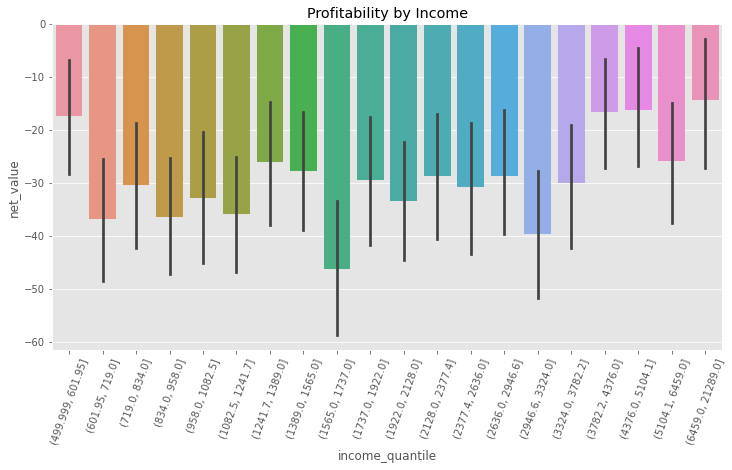

In [6]:
plt.figure(figsize=(12,6))
np.random.seed(123) ## seed because the CIs from seaborn uses boostrap

# pd.qcut create quantiles of a column
sns.barplot(data=train.assign(income_quantile=pd.qcut(train["income"], q=20)), 
            x="income_quantile", y="net_value")
plt.title("Profitability by Income")
plt.xticks(rotation=70);

而且，可悲的是，没有。然而，所有收入水平的平均净值均为负数。虽然富裕客户确实比非富裕客户"不那么糟糕"，但平均而言，他们仍然会产生负净值。所以收入在这里对我们没有多大帮助，但是其他变量呢，比如地区呢？如果我们的大部分成本来自不得不在遥远的地方为客户服务，我们应该期望该地区将有利可图的客户与无利可图的客户区分开来。
 
由于 region 已经是一个分类变量，因此我们不需要在此处使用分位数。让我们看看每个地区的平均净值。

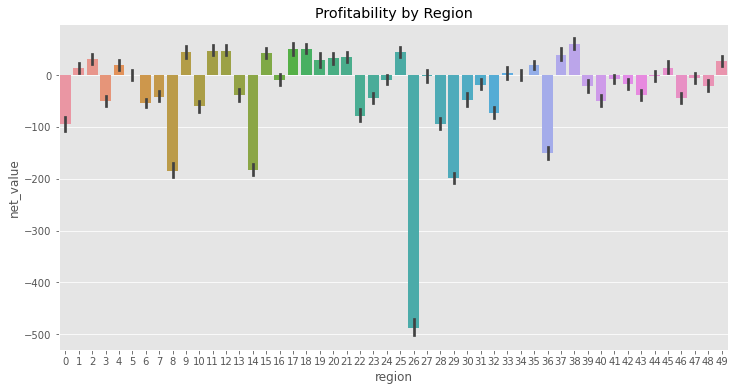

In [7]:
plt.figure(figsize=(12,6))
np.random.seed(123)
region_plot = sns.barplot(data=train, x="region", y="net_value")
plt.title("Profitability by Region");

太棒了！我们可以清楚地看到，有些地区是盈利的，比如区域2、17、39，有些是无利可图的，比如区域0、9、29和特别差的区域26。这看起来超级有希望！我们可以将此转化为一项政策：根据我们在这里获得的数据，仅与显示有利可图的地区开展业务*
 
需要注意的一件事是，我们正在做的是ML会做的事情，但以一种更简单的方式。也就是说，我们估计每个地区净值的预期值：\\(E[NetValue|Region]\\)。现在，我们需要接受这个估计，并用它做点什么。
 
为了构建此策略，我们将执行一些非常简单的操作。我们将围绕一个地区的预期净值构建一个95%的置信区间。如果它大于零，我们将与该地区做生意.
 
下面的代码生成一个字典，其中键是区域，值是 95% CI 的下限。然后，字典生成器仅筛选预期净值为正的区域。结果是我们将根据我们的政策与之开展业务的地区。

In [8]:
# extract the lower bound of the 95% CI from the plot above
regions_to_net = train.groupby('region')['net_value'].agg(['mean', 'count', 'std'])

regions_to_net = regions_to_net.assign(
    lower_bound=regions_to_net['mean'] - 1.96*regions_to_net['std']/(regions_to_net['count']**0.5)
)

regions_to_net_lower_bound = regions_to_net['lower_bound'].to_dict()
regions_to_net = regions_to_net['mean'].to_dict()

# filters regions where the net value lower bound is > 0.
regions_to_invest = {region: net 
                     for region, net in regions_to_net_lower_bound.items()
                     if net > 0}

regions_to_invest

{1: 2.9729729729729737,
 2: 20.543302704837856,
 4: 10.051075065003388,
 9: 32.08862469914759,
 11: 37.434210420891255,
 12: 37.44213667009523,
 15: 32.09847683044394,
 17: 39.52753893574483,
 18: 41.86162250217046,
 19: 15.62406327716401,
 20: 22.06654814414531,
 21: 24.621030401718578,
 25: 33.97022928360584,
 35: 11.68776141117673,
 37: 27.83183541449011,
 38: 49.740709395699994,
 45: 2.286387928016998,
 49: 17.01853709535029}

`regions_to_invest`拥有我们将要接触的所有地区。现在让我们看看这个策略在我们的测试集中是如何执行的，我们假装没有这个测试集。这是评估我们政策的关键一步，因为很可能只是偶然地，我们培训集中的某个地区似乎正在盈利。如果这只是由于随机性，我们不太可能在测试集中找到相同的模式。
 
为此，我们将筛选测试集，以仅包含定义为盈利的区域中的客户（根据我们的训练集）。然后，我们将绘制这些客户的净收入分布图，并显示我们保单的平均净收入。

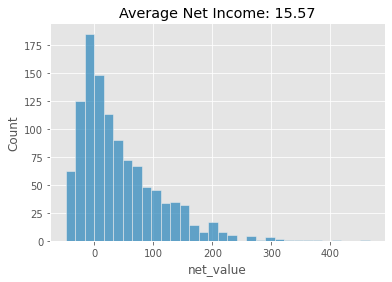

In [9]:
region_policy = (test[test["region"]
                      # filter regions in regions_to_invest
                      .isin(regions_to_invest.keys())]) 

sns.histplot(data=region_policy, x="net_value")
# average has to be over all customers, not just the one we've filtered with the policy
plt.title("Average Net Income: %.2f" % (region_policy["net_value"].sum() / test.shape[0]));

## 将机器学习模型作为策略的输入
 
如果你愿意做得更好，我们现在可以使用机器学习的力量。请记住，这可能会给整个事情增加复杂性，通常只有边际收益。但是，根据具体情况，边际收益可以转化为巨额资金，这就是为什么机器学习现在如此有价值。
 
在这里，我将使用渐变提升模型。这是一个相当复杂的模型，但使用起来非常简单。出于我们的目的，我们不需要深入了解它是如何工作的。相反，请记住我们在ML速成课程中看到的内容：ML模型是一个超级强大的预测机器，具有一些复杂性参数。它是一个估计\\(E[Y|X]\\)。越复杂，模型就越强大。但是，如果复杂性太高，模型将过度拟合，学习噪声，并且不能很好地泛化到看不见的数据。因此，我们需要在此处使用交叉验证来查看模型是否具有正确的复杂性。
 
现在，我们需要问，如何利用良好的预测来改进我们简单的区域政策，以识别和吸引有利可图的客户？我认为，我们可以在这方面作出两项主要改进。首先，您必须同意，遍历所有功能以查找区分好客户和坏客户的功能是一个繁琐的过程。在这里，我们只有3个（年龄，收入和地区），所以它不是那么糟糕，但想象一下，如果我们有超过100个。此外，您必须小心[多次测试](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)和假阳性率的问题。第二个原因是，您可能需要多个功能来区分客户。在我们的示例中，我们认为区域以外的功能也具有一些有关客户盈利能力的信息。当然，当我们单独看收入时，它并没有给我们带来多少，但是那些几乎没有盈利的地区的收入呢？也许，在这些地区，如果我们只关注更富有的客户，我们仍然可以获得一些利润。从技术上讲，我们说的是\\(E[NetValue|Region, Income, Age]\\) 是比\\(E[NetValue|Region]\\) 更好的`净值`预测因子。这很有道理。在地区之上使用更多关于收入和年龄的信息应该使我们能够更好地预测净值。
 
提出这些涉及交互多个功能的更复杂的策略可能非常复杂。我们必须考虑的组合随着功能数量的增加而呈指数级增长，这根本不是一件实际的事情。Istead，我们能做的就是把所有这些特征都放到机器学习模型中，让它为我们学习这些交互。这正是我们下一步要做的。
 
该模型的目标是使用`region`，`income`，`age`来预测`net_value`。为了帮助它，我们将采用区域特征（这是分类的），并使用数值对其进行编码。我们将用训练集上区域的平均净值替换每个区域。还记得我们把它们存储在`regions_to_net`字典中吗？有了这个，我们所要做的就是调用方法`.replace()`并将此字典作为参数传递。我将为此创建一个函数，因为我们将多次执行此替换。这种转换特征以促进学习的过程通常称为特征工程。

In [10]:
def encode(df): 
    return df.replace({"region": regions_to_net})

接下来，我们的模型将从 [Sklearn](https://scikit-learn.org/stable/) 导入。他们所有的模型都有一个非常标准的用法。首先，实例化传入复杂性参数的模型。对于此模型，我们将估计器的数量设置为 400，最大深度设置为 4，依此类推。模型越深，估计器的数量越多，模型就越强大。当然，我们不能让它太强大，否则它会学习训练数据中的噪声或过度拟合。同样，您不需要知道这些参数的作用的详细信息。请记住，这是一个非常好的预测模型。然后，为了训练我们的模型，我们将调用`.fit()`方法，传递特征'X'和我们要预测的变量 - 或目标变量 - `net_value`。

In [11]:
model_params = {'n_estimators': 400,
                'max_depth': 4,
                'min_samples_split': 10,
                'learning_rate': 0.01,
                'loss': 'ls'}

features = ["region", "income", "age"]
target = "net_value"

np.random.seed(123)

reg = ensemble.GradientBoostingRegressor(**model_params)

# fit model on the training set
encoded_train = train[features].pipe(encode)
reg.fit(encoded_train, train[target]);

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


现在已训练该模型。接下来，我们需要检查它是否是好的。为此，我们可以在**测试集**上查看此模型的预测性能。有大量的指标可以评估机器学习模型的预测性能。在这里，我将使用一个名为 \\(R^2\\) 的函数。我们不需要在这里详细介绍。可以说\\(R^2\\)用于评估预测连续变量的模型（如`net_income`）。此外，\\(R^2\\)可以从负无穷大（如果预测值低于平均值，则为负）变为 1.0。\\(R^2\\)告诉我们`net_income`中的方差有多少是由我们的模型解释的。

In [12]:
train_pred = (encoded_train
              .assign(predictions=reg.predict(encoded_train[features])))

print("Train R2: ", r2_score(y_true=train[target], y_pred=train_pred["predictions"]))
print("Test R2: ", r2_score(y_true=test[target], y_pred=reg.predict(test[features].pipe(encode))))

Train R2:  0.7108790300152951
Test R2:  0.6938513063048141


在本例中，模型解释了训练集中约 71% 的`net_income`方差，但仅解释了测试集中约 69% 的`net_income`方差。这是预料之中的。由于模型可以访问训练集，因此通常会高估那里的性能。只是为了好玩（并了解有关过拟合的更多信息），请尝试将模型的`max_depth`设置为14，看看会发生什么。您可能会看到列车 \\(R^2\\) 飙升，但测试集 \\(R^2\\) 变低。这就是过度拟合的样子。
 
接下来，为了制定我们的策略，我们将测试集预测存储在"预测"列中。此预测是\\(E[NetValue|Age, Income, Region ]\\)。

In [13]:
model_policy = test.assign(prediction=reg.predict(test[features].pipe(encode)))

model_policy.head()

,customer_id,region,income,age,net_value,prediction
5952,5952,19,1983,23,21,47.734883
1783,1783,31,914,31,-46,-36.026935
4811,4811,33,1349,25,-19,22.553420
145,145,20,1840,26,55,48.306256
7146,7146,19,3032,34,-17,7.039414


就像我们对`region`特征所做的那样，我们可以通过对模型的预测来显示平均净值。由于模型是连续的而不是分类的，因此我们需要首先使其离散。这样做的一种方法是使用pandas的`pd.qcut`（天！我超喜欢这个函数！），它使用模型预测将数据划分为分位数。让我们使用 50 个分位数，因为 50 是我们拥有的区域数。作为惯例，我倾向于将这些模型分位数称为**模型波段**，因为它给人的直觉是，这个组在一个波段内有模型预测，比如说，从-10到200。

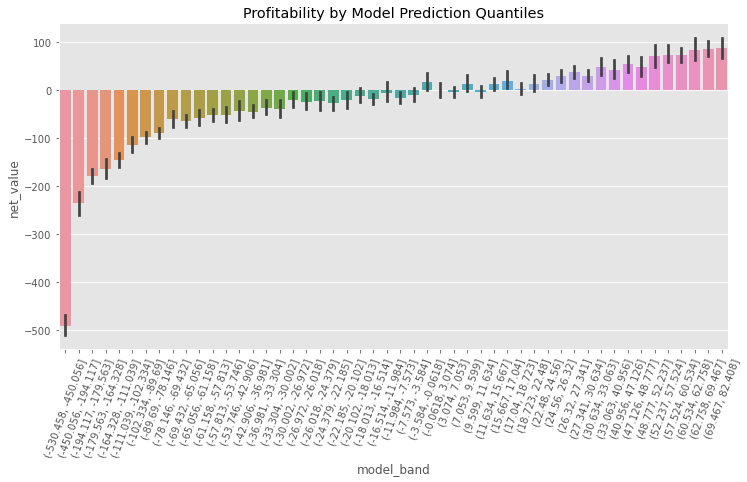

In [14]:
plt.figure(figsize=(12,6))

n_bands = 50
bands = [f"band_{b}" for b in range(1,n_bands+1)]

np.random.seed(123)
model_plot = sns.barplot(data=model_policy
                         .assign(model_band = pd.qcut(model_policy["prediction"], q=n_bands)),
                         x="model_band", y="net_value")
plt.title("Profitability by Model Prediction Quantiles")
plt.xticks(rotation=70);

这里需要注意的是，有些模型波段的净值是超负的，而也有一些波段的净值非常正。此外，有些波段我们不知道净值是负数还是正数。最后，注意它们如何从左到右呈上升趋势。由于我们预测的是净收入，因此预测值将与被预测对象的实际值成正比。

现在，要将使用机器学习模型的策略与仅使用区域的策略进行比较，我们还可以显示净收益的直方图以及测试集中的总净值。

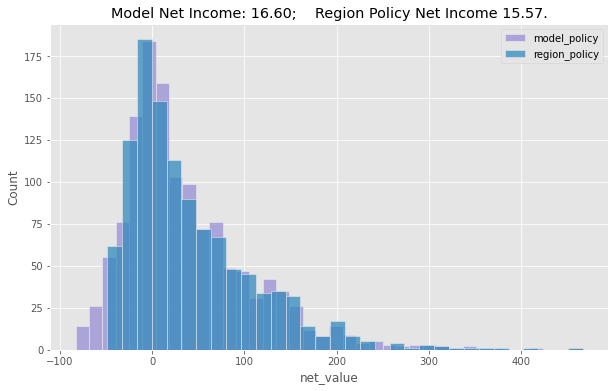

In [15]:
plt.figure(figsize=(10,6))
model_plot_df = (model_policy[model_policy["prediction"]>0])
sns.histplot(data=model_plot_df, x="net_value", color="C2", label="model_policy")

region_plot_df = (model_policy[model_policy["region"].isin(regions_to_invest.keys())])
sns.histplot(data=region_plot_df, x="net_value", label="region_policy")

plt.title("Model Net Income: %.2f;    Region Policy Net Income %.2f." % 
          (model_plot_df["net_value"].sum() / test.shape[0],
           region_plot_df["net_value"].sum() / test.shape[0]))
plt.legend();

正如我们所看到的，该模型生成的策略比仅使用"区域"功能更好，但并不多。虽然模型策略将使我们在测试集上达到约16.6雷亚尔/客户，但区域政策将使我们仅获得15.5雷亚尔/客户。它只是稍微好一点，但如果你有大量的客户，这可能已经证明使用模型而不是简单的单一功能策略是合理的。
 
 
## 细粒度策略
 
回顾一下，到目前为止，我们测试了所有策略中最简单的策略，即与所有客户互动。此策略可以看作是估计边际净值 \\(\hat{E}[NetValue] > 0\\)。由于这不起作用（每个客户的平均净收入为负），我们开发了一个基于区域的单一功能策略：我们将在某些区域开展业务，但在其他区域不开展业务，或者 \\(\hat{E}[NetValue|Region] > 0\\)。这已经给了我们非常好的结果。接下来，我们进行了全面的机器学习，使用了一个使用所有功能的预测模型： \\(\hat{E}[NetValue|Region, Income, Age] > 0\\)。然后，我们使用该模型作为策略的输入，并选择与净收入预测高于零的所有客户开展业务。
 
在这里，策略处理的决定非常简单：与客户互动或不与客户互动。到目前为止，我们制定的政策是处理二元情况的。它们以以下形式出现
 
```
如果预测值>0，那么做生意，否则就不做生意。
```
 
这就是我们所说的**阈值**。如果预测超过某个阈值（在我们的例子中为零，但可能是其他东西），我们做出一个决定，如果没有，我们采取另一个决定。在现实生活中可以应用的另一个例子是交易欺诈检测：如果检测到欺诈的模型的预测分数高于某个阈值"X"，我们将拒绝交易，否则我们批准它。
 
 
阈值在许多实际案例场景中都有效，当决策的性质是二元的时，它特别有用。但是，我们可以想到事情往往更微妙的情况。例如，您可能愿意在营销上花费更多，以引起非常有利可图的客户的注意。或者，您可能希望将他们添加到一些主要客户列表中，在那里您可以给予他们特殊待遇，但这样做也会花费更多。请注意，如果我们包括这些可能性，您的决定将从二元（参与与不参与）到持续：您应该在客户身上投入多少。
 
在这里，对于下一个示例，假设您的决定不仅仅是与谁做生意，而是您应该在每个客户身上投入多少营销成本。为了这个例子，假设你正在与其他公司竞争，谁在特定客户身上的营销上花更多的钱，谁就赢得了这个客户（很像一个竞标机制）。在这种情况下，在高利润客户身上投入更多资金是有道理的，在利润微薄的客户身上投资得更少，在非盈利客户身上投资更少。
 
一种方法是将你的预测分解为波段。我们之前已经这样做了，用于模型比较，但在这里我们将这样做是为了决策。让我们创建 20 个波段。我们可以将它们视为分位数或等大小的组。根据我们的预测，第一个波段将包含利润减少5%的客户*，第二个波段将包含从5%到10%的利润减少的客户，依此类推。最后一个乐队，20个，将包含最有利可图的客户。
 
请注意，装箱也必须在训练集上进行估计，并应用于测试集！因此，我们将在训练集上使用 `pd.qcut` 计算区段。为了实际进行装箱，我们将使用`np.digitize`，传递在训练集上预先计算的箱子。

In [16]:
def model_binner(prediction_column, bins):
    # find the bins according to the training set
    bands = pd.qcut(prediction_column, q=bins, retbins=True)[1]
    
    def binner_function(prediction_column):
        return np.digitize(prediction_column, bands)
    
    return binner_function
    

# train the binning function
binner_fn = model_binner(train_pred["predictions"], 20)

# apply the binning
model_band = model_policy.assign(bands = binner_fn(model_policy["prediction"]))
model_band.head()

,customer_id,region,income,age,net_value,prediction,bands
5952,5952,19,1983,23,21,47.734883,18
1783,1783,31,914,31,-46,-36.026935,7
4811,4811,33,1349,25,-19,22.553420,15
145,145,20,1840,26,55,48.306256,18
7146,7146,19,3032,34,-17,7.039414,13


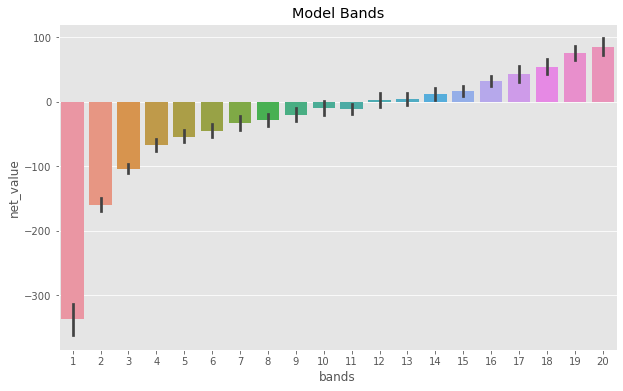

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=model_band, x="bands", y="net_value")
plt.title("Model Bands");

有了这些频段，我们可以将大部分营销投资分配给20和19频段。请注意，我们是如何从二元决策（参与与不参与）转变为连续决策：为每个客户在营销上投入多少资金。当然，您可以进一步微调它，添加更多波段。在限制中，您根本没有装箱。相反，您正在使用模型的原始预测，并且可以创建决策规则，例如
 
```
mkt_investments_i = model_prediction_i * 0.3
```
 
对于每个客户\\(i\\)，您投资了模型预测的net_value的30%（30%是任意数字，但您明白了）。

 
## 关键思想
 
我们在很短的时间内已经在这里涵盖了很多领域，所以我认为这个回顾对于我们看看我们在这里取得的成就非常重要。首先，我们了解到大多数机器学习应用程序只涉及做出良好的预测，其中预测被理解为从已知输入到最初未知但定义明确的输出的映射。我们也可以把预测理解为估计一个期望函数 \\(E[Y|X]\\)。但当我说"仅此而已"时，我并不完全公平。我们还看到了好的预测可以解决比我们乍一看可能意识到的更多的问题，比如语言翻译和自动驾驶汽车。
 

然后，我们回到现实，看看好的预测如何帮助我们完成更常见的任务，比如弄清楚我们应该引入哪个客户以及避免哪些客户。具体来说，我们研究了如何预测客户利润。根据这一预测，我们制定了一项政策，决定我们应该与谁做生意。请注意，这只是可以应用预测模型的示例。肯定还有其他应用的基调，例如信用卡承销，欺诈检测，癌症诊断以及任何可能有用的良好预测。

这里的关键点是，**如果你能将你的业务问题描述为预测问题，那么机器学习可能是这项工作的正确工具**。我真的想多强调这一点。随着围绕机器学习的所有炒作，我觉得人们忘记了这一非常重要的一点，并且经常最终制作出非常擅长预测完全无用的东西的模型。他们不是考虑如何将业务问题构建为预测问题，然后用机器学习来解决它，而是经常构建一个预测模型，并试图看看哪些业务问题可以从该预测中受益。这可能有效，但通常情况下，这是一个黑暗中的镜头，只会在寻找问题时生成解决方案。
 
